# Coursera Python Capstone Notebook

## Project Title: Food Tourism in Toronto

### Introduction: Business Problem 

In this project, we are going to look at the distribution of restaurants across the city of Toronto. Specifically this project will look at which neighbourhoods you can find a high concentration of certain types of cuisine.

Toronto has been named the most diverse city in the world by BBC Radio. Toronto has long been recognized as one of the most multicultural cities in the world, with over 230 different nationalities within Ontario's capital city. It has long been the entry point for many immigrants into the country, and these immigrants have brought with them a wide variety of cuisines. Today, these different cuisines can be found in the restaurants and diners that have sprung up in immigrant areas of the city, Italian restaurants in little Italy, Chinese restaurants in Chinatown etc.

Food tourism is a growing industry in Toronto. Over the years a number of companies have begun running food tours in the city, catering to the needs of these tourists. The goal of this project is to give tourists an idea of where a large number of restaurants catering to a given cuisine. This will be of particular use to foreign tourists hoping to get a taste of everything New York has to offer. It can also be used by food tourism companies to market specific city neighbourhoods to these tourists.

At the end of the project, I will suggest the path that food tours can take to most efficiently taste all Toronto has to offer.

### Data
I will use Foursquare data to profile the restaurant that can be found in Toronto. Foursquare is an American technology company focusing on location data. Foursquare has a large repository of data on restaurants, but it does not have a complete picture of the restaurants that can be found in Toronto. On initial inspection, there are approximately 270 types of venues listed in the Toronto area. Not all of these will be included in the scope of this project. Foursquare data can be found at https://api.foursquare.com

Postal codes and neighbourhood names in Toronto will be taken from Wikipedia: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M 

Spatial data will be taken from http://cocl.us/Geospatial_data

### Data Analysis Methodology 



In [2]:
! pip install bs4
!pip install lxml
!pip install html5lib

In [3]:
from bs4 import BeautifulSoup 
import requests
import lxml
import pandas as pd
import numpy as np
import html5lib
import io

In [4]:
html=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
url2 = 'http://cocl.us/Geospatial_data'

In [5]:
soup = BeautifulSoup(html, 'html5lib')
table = soup.find('table_class',{'class':'navbox'})

In [6]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
      
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)
    pass

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})



In [7]:
postcode_table = requests.get(url2).content
postcode_lat_long = pd.read_csv(io.StringIO(postcode_table .decode('utf-8')))

In [8]:
Toronto = pd.merge(df, postcode_lat_long, left_on = "PostalCode", right_on="Postal Code" )
Toronto= Toronto.drop(["Postal Code"], axis= 1)

In [9]:
Toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [10]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37ha70c682_1
  - defaults/noarch::ibm-wsrt-py37main-main==custom=2155
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=2155
done

# All requested packages already installed.



In [11]:
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors

In [1]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [12]:
latitude = Toronto['Latitude'].mean()
longitude = Toronto['Longitude'].mean()

In [13]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11.2)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['Borough'], Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [14]:
CLIENT_ID = 'MF004K2FJI1DI00L20LGTYA2KQNQLCMBU305JDS5YOYSKVF1' # your Foursquare ID
CLIENT_SECRET = 'N3ZBJUODZN0IN1YOFIMCW4VOVYUMDRHCX4JEH3DECBRI4O12' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [16]:
names = Toronto['Neighborhood']
latitude = Toronto['Latitude']
longitude = Toronto['Longitude']
Toronto_venues1 = getNearbyVenues(names, latitude, longitude, radius=500)
Toronto_venues1.head()

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [20]:
Toronto_venues = Toronto_venues1

In [21]:
Toronto_venues['Venue Category'].unique()

array(['Park', 'Food & Drink Shop', 'Hockey Arena',
       'Portuguese Restaurant', 'Coffee Shop', 'Pizza Place', 'Bakery',
       'Distribution Center', 'Spa', 'Restaurant', 'Breakfast Spot',
       'Gym / Fitness Center', 'Historic Site', 'Chocolate Shop',
       'Farmers Market', 'Pub', 'Performing Arts Venue', 'Dessert Shop',
       'French Restaurant', 'Yoga Studio', 'Café', 'Theater',
       'Event Space', 'Shoe Store', 'Art Gallery', 'Brewery',
       'Cosmetics Shop', 'Electronics Store', 'Bank', 'Beer Store',
       'Hotel', 'Wine Shop', 'Antique Shop', 'Boutique',
       'Furniture / Home Store', 'Vietnamese Restaurant',
       'Clothing Store', 'Accessories Store', "Women's Store",
       'Miscellaneous Shop', 'Italian Restaurant', 'Beer Bar', 'Creperie',
       'Sushi Restaurant', 'Burrito Place', 'Mexican Restaurant', 'Diner',
       'Discount Store', 'Fried Chicken Joint', 'Japanese Restaurant',
       'Smoothie Shop', 'Sandwich Place', 'Gym', 'Bar',
       'College Audit

In [22]:
Restaurant_List = [
'Portuguese Restaurant',
'Italian Restaurant',
'Ramen Restaurant',
'Thai Restaurant',
'Modern European Restaurant',
'Middle Eastern Restaurant',
'Ethiopian Restaurant',
'Asian Restaurant',
'Korean Restaurant',
'Colombian Restaurant',
'Tibetan Restaurant',
'Vietnamese Restaurant',
'Mexican Restaurant',
'Japanese Restaurant',
'German Restaurant',
'Irish Pub',
'Belgian Restaurant',
'Cuban Restaurant',
'Filipino Restaurant',
'Taiwanese Restaurant',
'Greek Restaurant'
]

In [23]:
indexNames = Toronto_venues[ ~Toronto_venues['Venue Category'].isin(Restaurant_List)].index
Toronto_venues.drop(indexNames , inplace=True)

In [59]:
# create map of Toronto restraunt neighborhoods using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11.2)

# add markers to map
for lat, lng,  neighborhood in zip(Toronto_venues['Neighborhood Latitude'], Toronto_venues['Neighborhood Longitude'],  Toronto_venues['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [24]:
print(Toronto_venues.shape)
Toronto_venues.head()

(195, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
53,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Lac Vien Vietnamese Restaurant,43.721259,-79.468472,Vietnamese Restaurant
66,Ontario Provincial Government,43.662301,-79.389494,Mercatto,43.660391,-79.387664,Italian Restaurant
75,Ontario Provincial Government,43.662301,-79.389494,Como En Casa,43.665160,-79.384796,Mexican Restaurant
81,Ontario Provincial Government,43.662301,-79.389494,Tokyo Grill,43.665085,-79.384707,Japanese Restaurant


In [25]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Asian Restaurant,Belgian Restaurant,Colombian Restaurant,Cuban Restaurant,Ethiopian Restaurant,Filipino Restaurant,German Restaurant,Greek Restaurant,Irish Pub,...,Korean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Portuguese Restaurant,Ramen Restaurant,Taiwanese Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant
0,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Bayview Village,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000
3,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000
4,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,Cedarbrae,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
6,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,...,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.0,0.111111,0.000000,0.000000
7,Christie,0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.1000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,0.0,0.100000,0.000000,0.000000
9,"Clarks Corners, Tam O'Shanter, Sullivan",0.000000,0.000000,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000


In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Middle Eastern Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Mexican Restaurant
1,Bayview Village,Japanese Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant
2,"Bedford Park, Lawrence Manor East",Italian Restaurant,Thai Restaurant,Greek Restaurant,Asian Restaurant,Mexican Restaurant,Tibetan Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant
3,Berczy Park,Japanese Restaurant,Thai Restaurant,Greek Restaurant,Korean Restaurant,Tibetan Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant
4,"Brockton, Parkdale Village, Exhibition Place",Italian Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant


Determining the optimal number of clusters
I used elbow method and Silhouette method to find optimal number of clusters.

In [28]:
Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

In [29]:
Toronto_grouped_clustering.head()

,Asian Restaurant,Belgian Restaurant,Colombian Restaurant,Cuban Restaurant,Ethiopian Restaurant,Filipino Restaurant,German Restaurant,Greek Restaurant,Irish Pub,Italian Restaurant,...,Korean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Portuguese Restaurant,Ramen Restaurant,Taiwanese Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Elbow Method

In [30]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Toronto_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

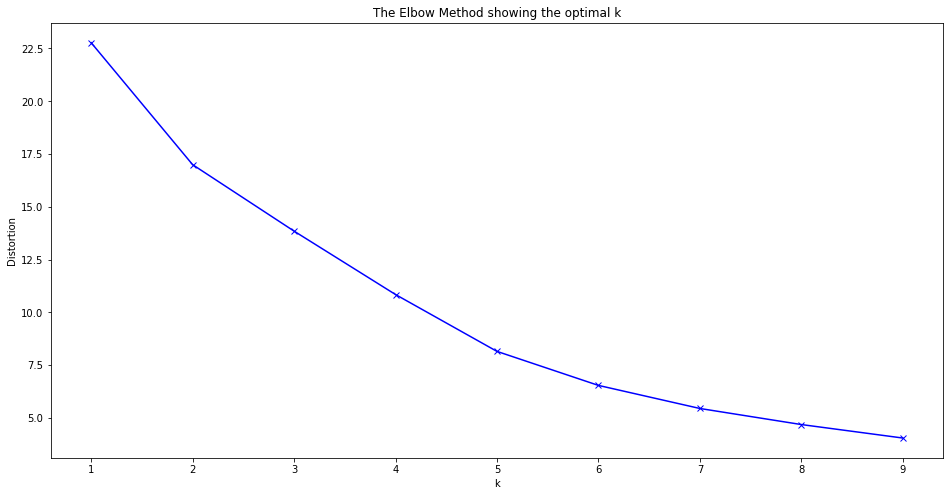

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The Silhouette Method

In [40]:
from sklearn.metrics import silhouette_score
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(Toronto_grouped_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(Toronto_grouped_clustering, labels, metric = 'euclidean'))

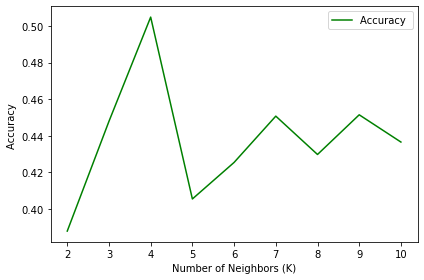

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),sil,'g')

plt.legend(('Accuracy ', '+/- 1xstsild','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [42]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:99]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0,
       1, 1, 0], dtype=int32)

In [43]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [44]:
Toronto_merged = Toronto

# merge Toronto_grouped with Toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Portuguese Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.0,Vietnamese Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,0.0,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant


In [45]:
indexNames1 = Toronto_merged[  Toronto_merged['1st Most Common Venue'].isnull()  ].index
Toronto_merged.drop(indexNames1 , inplace=True)

In [46]:
Toronto_merged['Cluster Labels'] = Toronto_merged['Cluster Labels'].fillna(kclusters +1)


In [47]:
# create map
latitude = Toronto['Latitude'].mean()
longitude = Toronto['Longitude'].mean()
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters + 1)
ys = [i + x + (i*x)**2 for i in range(kclusters + 1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
Cluster0 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0]
Cluster0

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Portuguese Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,0.0,Japanese Restaurant,Italian Restaurant,Mexican Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant
7,M3B,North York,Don Mills North,43.745906,-79.352188,0.0,Japanese Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.0,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Thai Restaurant,Modern European Restaurant,Mexican Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Irish Pub
10,M6B,North York,Glencairn,43.709577,-79.445073,0.0,Asian Restaurant,Japanese Restaurant,Colombian Restaurant,Mexican Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant
13,M3C,North York,Don Mills South,43.725900,-79.340923,0.0,Asian Restaurant,Italian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,Italian Restaurant,Asian Restaurant,Irish Pub,Thai Restaurant,Middle Eastern Restaurant,Belgian Restaurant,Japanese Restaurant,German Restaurant,Greek Restaurant,Filipino Restaurant
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.0,Japanese Restaurant,Thai Restaurant,Greek Restaurant,Korean Restaurant,Tibetan Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0.0,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Thai Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Tibetan Restaurant,Taiwanese Restaurant,Ramen Restaurant
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0.0,Italian Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant


In [49]:
Cluster1 =Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1]
Cluster1

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,1.0,Middle Eastern Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Mexican Restaurant
29,M4H,East York,Thorncliffe Park,43.705369,-79.349372,1.0,Middle Eastern Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Mexican Restaurant
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,1.0,Middle Eastern Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Mexican Restaurant
70,M9P,Etobicoke,Westmount,43.696319,-79.532242,1.0,Middle Eastern Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Mexican Restaurant
71,M1R,Scarborough,"Wexford, Maryvale",43.750071,-79.295849,1.0,Middle Eastern Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Mexican Restaurant
74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,1.0,Middle Eastern Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Mexican Restaurant


In [50]:
Cluster2 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2]
Cluster2

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,2.0,Mexican Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant
23,M4G,East York,Leaside,43.709060,-79.363452,2.0,Mexican Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant
73,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2.0,Mexican Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant


In [51]:
Cluster3 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3]
Cluster3

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.0,Vietnamese Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant
65,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,3.0,Vietnamese Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant
86,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,3.0,Vietnamese Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant


In [52]:
from math import sin, cos, sqrt, atan2, radians
def lat_long_dist(p1, p2):
    R = float(6373.0)

    lat1 = float(Toronto_merged[Toronto_merged["Neighborhood"] == p1 ]['Latitude'] )
    lon1 = float(Toronto_merged[Toronto_merged["Neighborhood"] == p1 ]['Longitude'])
    lat2 = float(Toronto_merged[Toronto_merged["Neighborhood"] == p2 ]['Latitude'] )
    lon2 = float(Toronto_merged[Toronto_merged["Neighborhood"] == p2 ]['Longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2*atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [60]:
distances = 10000000000000
path = []
path2 = []
for cluster1 in range(4):
    group1 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == cluster1 ]
    for cluster2 in range(4):
        if cluster2 == cluster1:
            pass
        else:
            group2 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == cluster2]
            for cluster3 in range(4):
                if cluster3 == cluster1 or cluster3 ==cluster2:
                    pass
                else:
                    group3 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == cluster3]
                    for cluster4 in range(4):
                        if cluster4 == cluster1 or cluster4 == cluster2 or cluster4 == cluster3:
                            pass
                        else:
                            group4 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == cluster4]
                            
                            ij = 1000000000000
                            jk = 1000000000000
                            kl = 1000000000000
                                                      
                            for i in group1["Neighborhood"]:
                                for j in group2["Neighborhood"]:
                                    ij1 = lat_long_dist(i,j)
                                    if ij > ij1:
                                        ij = ij1
                                        for k in group3["Neighborhood"]:
                                            jk1 = lat_long_dist(j,k)
                                            if jk > jk1:
                                                jk = jk1
                                                for l in group4["Neighborhood"]:
                                                    kl1 = lat_long_dist(k,l)
                                                    if kl > kl1:
                                                        kl = kl1
                                                        dist = ij + jk + kl
                                                        if dist < distances:
                                                            distances = dist
                                                            path = [i,j,k,l]
                                                            path2 = [cluster1, cluster2, cluster3, cluster4]

                                    

print(path)
print(path2)

['The Annex, North Midtown, Yorkville', 'Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park', 'Davisville', 'North Toronto West']
[1, 3, 0, 2]


In [54]:
indexNames3 = Toronto_merged[~ Toronto_merged["Neighborhood"].isin(path)].index
Toronto_tour = Toronto_merged.drop(indexNames3)

In [55]:
Toronto_tour.reset_index()

,index,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,73,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,2.0,Mexican Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant
1,74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,1.0,Middle Eastern Restaurant,Asian Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Mexican Restaurant
2,79,M4S,Central Toronto,Davisville,43.704324,-79.388790,0.0,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Greek Restaurant,Mexican Restaurant,Tibetan Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant
3,86,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,3.0,Vietnamese Restaurant,Korean Restaurant,Tibetan Restaurant,Thai Restaurant,Taiwanese Restaurant,Ramen Restaurant,Portuguese Restaurant,Modern European Restaurant,Middle Eastern Restaurant,Mexican Restaurant


In [56]:
latitude = Toronto['Latitude'].mean()
longitude = Toronto['Longitude'].mean()
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters + 1)
ys = [i + x + (i*x)**2 for i in range(kclusters + 1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_tour['Latitude'], Toronto_tour['Longitude'], Toronto_tour['Neighborhood'], Toronto_tour['Cluster Labels']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters